In [1]:
#Python kütüphanelerini içe aktar
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#CSV dosyasını okumak 
#https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019?select=bestsellers+with+categories.csv
dataset = pd.read_csv('bestsellers with categories.csv')

In [6]:
#İlk 5 satırı görüntüle
dataset.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [7]:
#Son 5 satırı görüntüle
dataset.tail(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [11]:
#Veri setinin türünü tanımlamak:
type(dataset)

pandas.core.frame.DataFrame

In [12]:
##Tüm sütunların adların görmek ve satırların türlerini listelemek:
dataset.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [13]:
#Veri setindeki tüm satırların türlerini görüntülemek için .dtypes veya .info() kullanılabilinir. 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [14]:
#Veri setinin boyutlarını görüntülemek:  
dataset.shape

(550, 7)

In [16]:
#Numerik değerler:
numerical_features = [numeric for numeric in dataset.columns if dataset[numeric].dtype != 'O']
dataset[numerical_features].head()

,User Rating,Reviews,Price,Year
0,4.7,17350,8,2016
1,4.6,2052,22,2011
2,4.7,18979,15,2018
3,4.7,21424,6,2017
4,4.8,7665,12,2019


In [17]:
#Kategorik değerler:
categorical_features = [categoric for categoric in dataset.columns if dataset[categoric].dtype == 'O']
dataset[categorical_features].head()

,Name,Author,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,Non Fiction
1,11/22/63: A Novel,Stephen King,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,Non Fiction
3,1984 (Signet Classics),George Orwell,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,Non Fiction


**İstatistikleri Görüntüleme**

In [18]:
dataset.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [19]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User Rating,550.0,4.618364,0.226980,3.3,4.5,4.7,4.80,4.9
Reviews,550.0,11953.281818,11731.132017,37.0,4058.0,8580.0,17253.25,87841.0
Price,550.0,13.100000,10.842262,0.0,7.0,11.0,16.00,105.0
Year,550.0,2014.000000,3.165156,2009.0,2011.0,2014.0,2017.00,2019.0


In [20]:
dataset.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [22]:
#En çok incelenen kitaplar:
mostrev_10=dataset.sort_values("Reviews",ascending=False)[:10]
mostrev_10

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction


In [23]:
#En yüksek oyu alan Bestseller kitapların adları:
highest_rate = dataset[dataset["User Rating"]==4.9]
highest_rate=highest_rate.groupby("Name")["User Rating"].mean().reset_index()
highest_rate

,Name,User Rating
0,"Brown Bear, Brown Bear, What Do You See?",4.9
1,Dog Man and Cat Kid: From the Creator of Capta...,4.9
2,Dog Man: A Tale of Two Kitties: From the Creat...,4.9
3,Dog Man: Brawl of the Wild: From the Creator o...,4.9
4,Dog Man: Fetch-22: From the Creator of Captain...,4.9
5,Dog Man: For Whom the Ball Rolls: From the Cre...,4.9
6,Dog Man: Lord of the Fleas: From the Creator o...,4.9
7,"Goodnight, Goodnight Construction Site (Hardco...",4.9
8,Hamilton: The Revolution,4.9
9,Harry Potter and the Chamber of Secrets: The I...,4.9


**Korelasyon Bulma**

Korelasyon katsayısı, iki değişken arasındaki doğrusal ilişkinin gücünü ve yönünü ölçer ve değerleri -1 ile 1 arasında değişir. Özellik değişkenlerini hedef değişkenle ilişkilendirdiğimizde, belirli özellik değişkenleri ile hedef değişkenler arasında ne kadar bağımlılık olduğunu öğreniriz.

*   1 : güçlü pozitif ilişkiyi gösterir
*   0 : ilişki olmadığını gösterir
*   -1 : güçlü negatif ilişkiyi gösterir

In [24]:
dataset.corr()

<ipython-input-24-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


<ipython-input-25-7f50ddae0b15>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = dataset.corr()


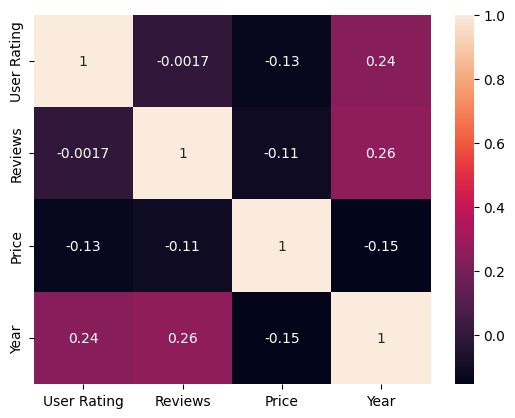

In [25]:
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [27]:
#İşlev, benzersiz değerlerin sayısını içeren bir seri döndürür.
dataset['Author'].value_counts()

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: Author, Length: 248, dtype: int64

In [28]:
dataset['Author'].value_counts(ascending=True)

JJ Smith                               1
Alice Schertle                         1
Celeste Ng                             1
Rob Bell                               1
Admiral William H. McRaven             1
                                      ..
American Psychological Association    10
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
Jeff Kinney                           12
Name: Author, Length: 248, dtype: int64

In [29]:
dataset['Author'].value_counts(ascending=True).sort_index(ascending=True)

Abraham Verghese              2
Adam Gasiewski                1
Adam Mansbach                 1
Adir Levy                     1
Admiral William H. McRaven    1
                             ..
Walter Isaacson               3
William Davis                 2
William P. Young              2
Wizards RPG Team              3
Zhi Gang Sha                  2
Name: Author, Length: 248, dtype: int64

In [31]:
dataset.groupby('Year')['Name'].value_counts()

Year  Name                                                                                                        
2009  Act Like a Lady, Think Like a Man: What Men Really Think About Love, Relationships, Intimacy, and Commitment    1
      Arguing with Idiots: How to Stop Small Minds and Big Government                                                 1
      Breaking Dawn (The Twilight Saga, Book 4)                                                                       1
      Crazy Love: Overwhelmed by a Relentless God                                                                     1
      Dead And Gone: A Sookie Stackhouse Novel (Sookie Stackhouse/True Blood)                                         1
                                                                                                                     ..
2019  Unicorn Coloring Book: For Kids Ages 4-8 (US Edition) (Silly Bear Coloring Books)                               1
      What Should Danny Do? (The Power to Cho

In [32]:
dataset.groupby('Year')['Name'].value_counts().to_frame()

Name
Year Name                                                    
2009 Act Like a Lady, Think Like a Man: What Men Rea...     1
     Arguing with Idiots: How to Stop Small Minds an...     1
     Breaking Dawn (The Twilight Saga, Book 4)              1
     Crazy Love: Overwhelmed by a Relentless God            1
     Dead And Gone: A Sookie Stackhouse Novel (Sooki...     1
...                                                       ...
2019 Unicorn Coloring Book: For Kids Ages 4-8 (US Ed...     1
     What Should Danny Do? (The Power to Choose Series)     1
     Where the Crawdads Sing                                1
     Wrecking Ball (Diary of a Wimpy Kid Book 14)           1
     You Are a Badass: How to Stop Doubting Your Gre...     1

[547 rows x 1 columns]

**Veri Görselleştirme**

<Axes: ylabel='Genre'>

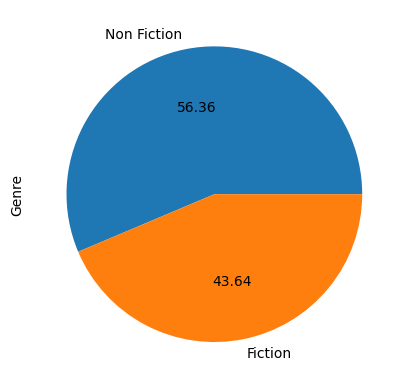

In [33]:
dataset["Genre"].value_counts().plot(kind="pie", autopct='%.2f',labels=dataset["Genre"].unique())

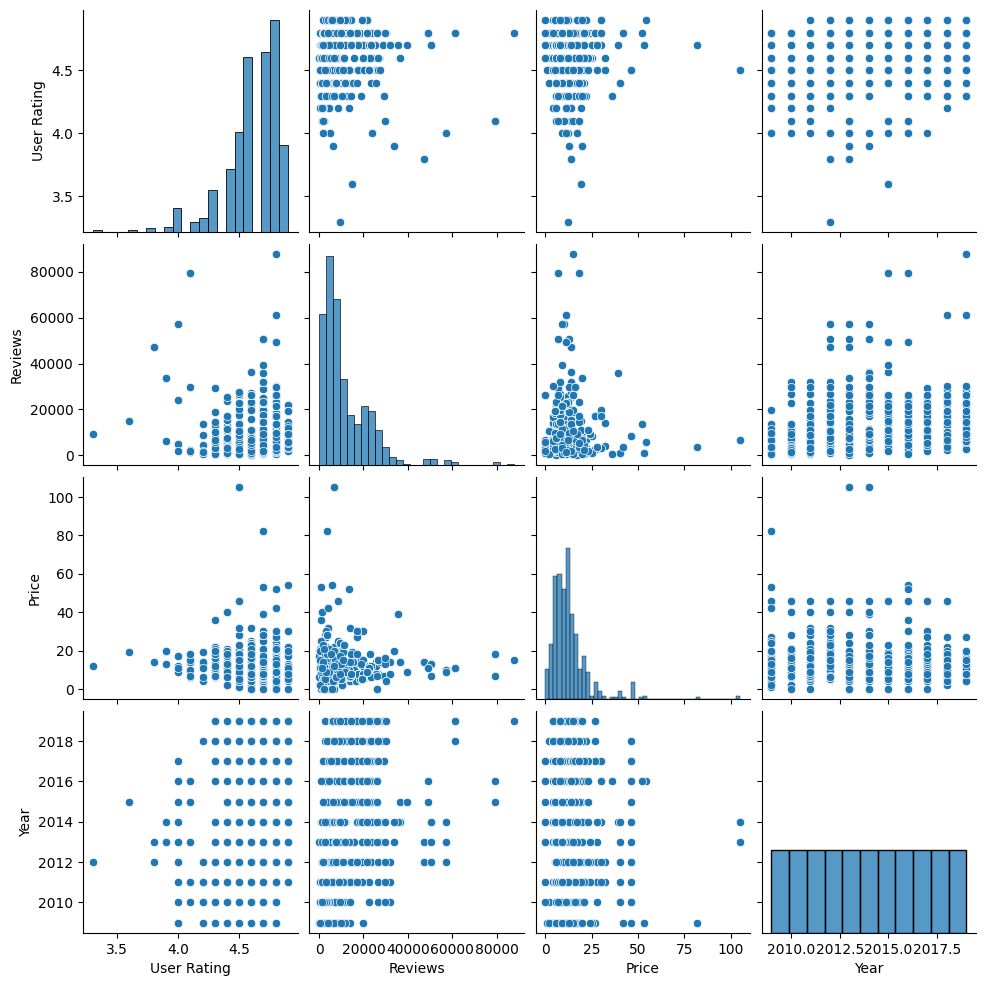

In [35]:
sns.pairplot(data = dataset[numerical_features])

<Axes: xlabel='User Rating', ylabel='count'>

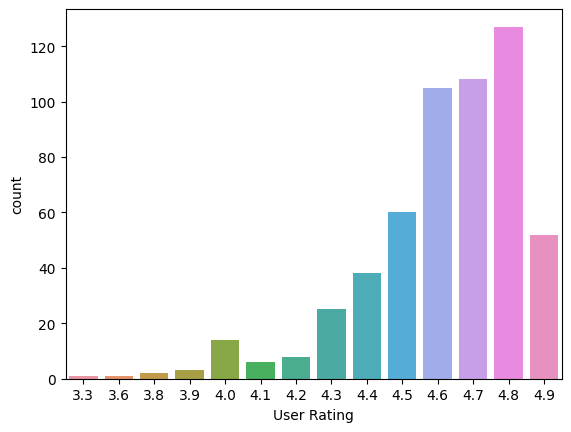

In [36]:
sns.countplot(x=dataset["User Rating"])

<ipython-input-39-9b7d1a8b87f3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Price'],color='purple')


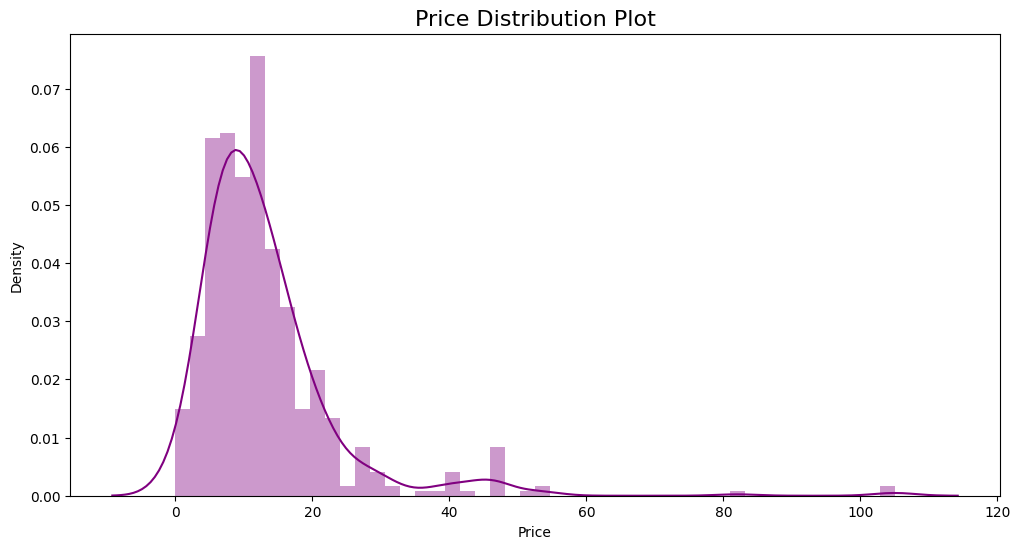

In [39]:
plt.figure(figsize=(12,6))
sns.distplot(dataset['Price'],color='purple')
plt.title('Price Distribution Plot',fontsize=16)
plt.show() 

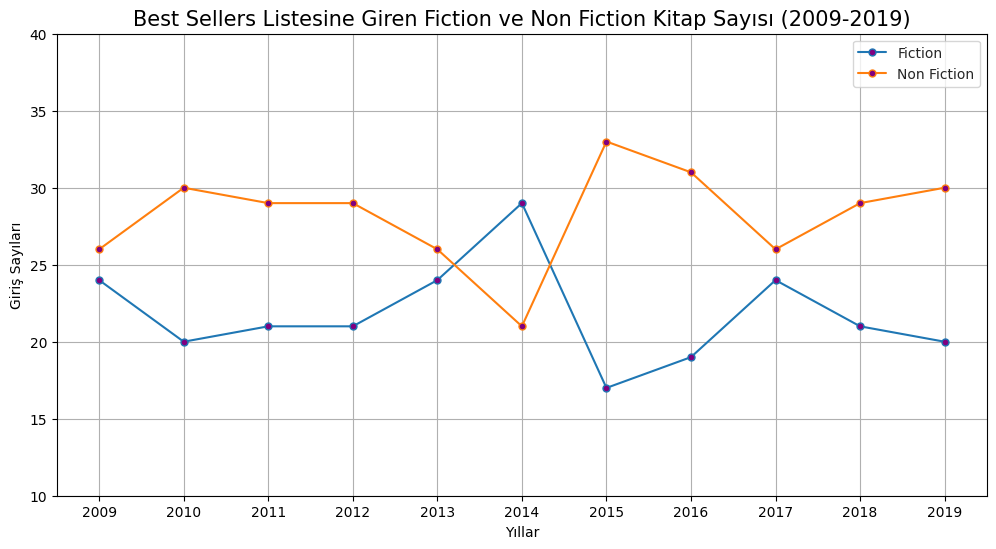

In [40]:
best_sellers = dataset.groupby(['Year','Genre']).count().unstack()['Name']
fig,axes=plt.subplots(1,1,figsize=(12,6))
sns.set_style('white')
axes.plot(best_sellers,markersize=5,markerfacecolor='purple',marker='o')
axes.set_xlabel('Yıllar')
axes.set_ylabel('Giriş Sayıları')
axes.set_xticks(best_sellers.index)
axes.set_ylim(10,40)
axes.spines['right'].set_color('black')
axes.spines['top'].set_color('black')
axes.legend(best_sellers)
axes.set_title('Best Sellers Listesine Giren Fiction ve Non Fiction Kitap Sayısı (2009-2019)',fontdict={'size':15})
plt.grid(1)
plt.show()

Text(0.5, 1.0, 'EN YÜKSEK FİYATLI İLK 10 KİTAP')

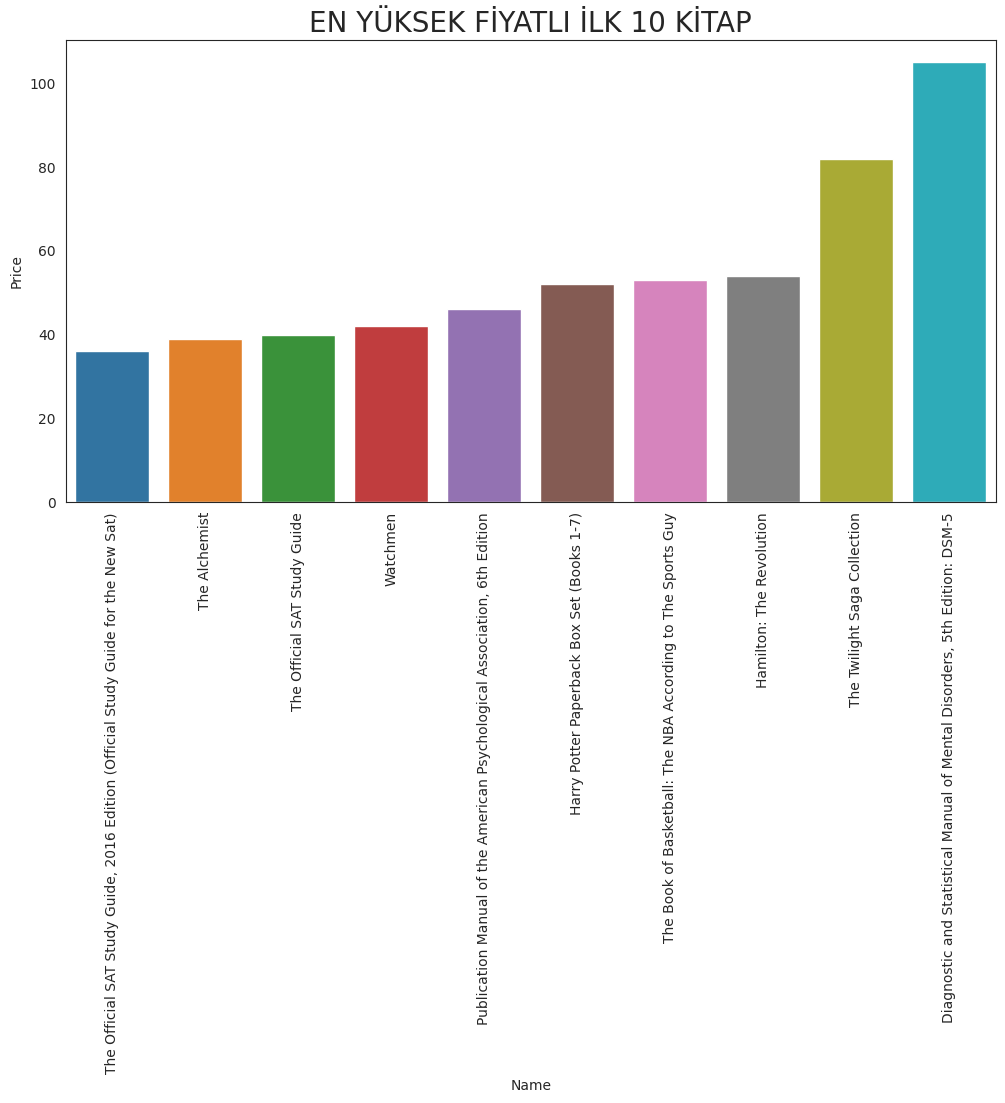

In [41]:
best_seller_high_price=dataset.groupby(dataset["Name"])["Price"].max().sort_values()[-10:].reset_index()
plt.figure(figsize=(12,6))
ax=sns.barplot(x=best_seller_high_price["Name"],y=best_seller_high_price["Price"])
plt.xticks(rotation=90)
plt.title("EN YÜKSEK FİYATLI İLK 10 KİTAP",fontsize=20)